LOAD DEPENDENCIES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

LOAD AND PREPARE DATA

In [25]:
import os

path = os.listdir('BreastCancer/train/')
classes = {'NoCancer':0, 'Cancer':1}

In [26]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'BreastCancer/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200, 200))
        Y.append(classes[cls])
        sharpen= np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        img=cv2.filter2D(img, -1, sharpen)
        X.append(img)

DATA ANALYSIS

In [27]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [28]:
np.unique(Y)

array([0, 1])

In [29]:
pd.Series(Y).value_counts()

1    600
0    600
dtype: int64

In [30]:
X.shape, X_updated.shape

((1200, 200, 200), (1200, 40000))

DATA VISUALIZATION

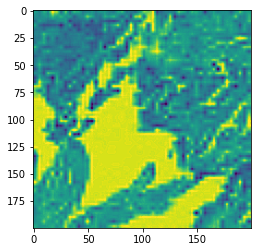

In [31]:
plt.imshow(X[0])

SPLIT DATA

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state = 10, test_size = 0.3)

In [33]:
xtrain.shape, xtest.shape

((840, 40000), (360, 40000))

FEATURE SCALING

In [34]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


MODEL TRAINING


In [35]:
from sklearn.svm import SVC

In [36]:
sv = SVC(kernel='rbf', random_state=1, gamma=0.001, C=1.1)
sv.fit(xtrain, ytrain)
print("Training Score: ", sv.score(xtrain, ytrain))
print("Testing Score: ", sv.score(xtest, ytest))

Training Score:  0.9345238095238095
Testing Score:  0.775


In [37]:
pred = sv.predict(xtest)
score = accuracy_score (ytest, pred)
print(score)

0.775


In [38]:
misclassified = np.where(ytest != pred)
misclassified

(array([  5,  12,  14,  38,  41,  46,  49,  65,  68,  71,  74,  75,  76,
         77,  79,  85,  92,  98, 100, 101, 114, 122, 123, 130, 135, 138,
        140, 141, 143, 145, 147, 149, 165, 167, 170, 172, 173, 179, 181,
        183, 188, 194, 195, 209, 210, 212, 219, 221, 235, 240, 241, 243,
        245, 247, 249, 252, 253, 259, 261, 262, 264, 269, 270, 272, 273,
        277, 292, 294, 297, 298, 304, 314, 332, 338, 344, 346, 347, 349,
        351, 353, 354], dtype=int64),)

In [39]:
print('Misclassified Predicted:', pred[5])
print('Actual Classification: ', ytest[5])

Misclassified Predicted: 1
Actual Classification:  0


In [40]:
print("Total Misclassified Samples: ", len(misclassified[0]))

Total Misclassified Samples:  81


TESTING ON 'TEST DATASET'

In [41]:
dec = {0:'NoCancer', 1:'Cancer'}

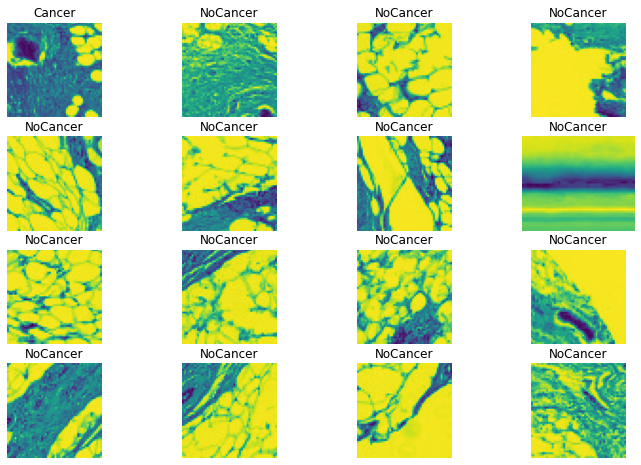

In [42]:
plt.figure(figsize=(12, 8))
p = os.listdir('BreastCancer/test/')
c=1
for i in os.listdir('BreastCancer/test/NoCancer/')[:16]: #testing first 16 images
    plt.subplot(4, 4, c)
    
    img = cv2.imread('BreastCancer/test/NoCancer/'+i,0)
    #plt.imshow(img)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c += 1

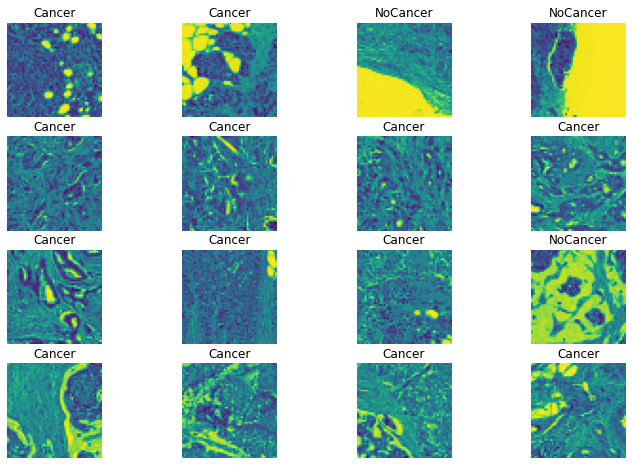

In [43]:
plt.figure(figsize = (12,8))
p = os.listdir('BreastCancer/test/')
c = 1
for i in os.listdir('BreastCancer/test/Cancer/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('BreastCancer/test/Cancer/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c += 1